<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Neural Networks More Hidden Neutrons</h1>


<h2>Objective</h2><ul><li> How to create complex Neural Network in pytorch.</li></ul> 


<h2>Table of Contents</h2>

<ul>
    <li><a href="#Prep">Preperation</a></li>
    <li><a href="#Data">Get Our Data</a></li>
    <li><a href="#Train">Define the Neural Network, Optimizer, and Train the Model</a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>

<hr>


<h2 id="Prep">Preparation</h2>


We'll need to import the following libraries for this lab.


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

Define the plotting functions.


In [2]:
def get_hist(model,data_set):
    activations=model.activation(data_set.x)
    for i,activation in enumerate(activations):
        plt.hist(activation.numpy(),4,density=True)
        plt.title("Activation layer " + str(i+1))
        plt.xlabel("Activation")
        plt.xlabel("Activation")
        plt.legend()
        plt.show()

In [3]:
def PlotStuff(X, Y, epoch=None, model=None):
    
    plt.plot(X[Y==0].numpy(),Y[Y==0].numpy(),'or',label='training points y=0 ' )
    plt.plot(X[Y==1].numpy(),Y[Y==1].numpy(),'ob',label='training points y=1 ' )

    if model!=None:
        plt.plot(X.numpy(),model(X).detach().numpy(),label='neral network ')
        plt.title('epoch ' + str(epoch))

    plt.legend()
    plt.show()

<h2 id="Data">Get Our Data</h2>


Define the class to get our dataset.


In [4]:
class Data(Dataset):
    def __init__(self):
        self.x=torch.linspace(-20, 20, 100).view(-1,1)
        self.y=torch.zeros(self.x.shape[0])
        self.y[(self.x[:,0]>-10)& (self.x[:,0]<-5)]=1
        self.y[(self.x[:,0]>5)& (self.x[:,0]<10)]=1
        self.y=self.y.view(-1,1)
        self.len=self.x.shape[0]
        
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len



<h2 id="Train">Define the Neural Network, Optimizer and Train the Model</h2>


Define the class for creating our model.


In [5]:
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)

        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=torch.sigmoid(self.linear2(x))
        return x

Create the function to train our model, which accumulate lost for each iteration to obtain the cost.


In [6]:
 def train(data_set,model,criterion, train_loader, optimizer, epochs=5,plot_number=10):
    cost=[]
    
    for epoch in range(1, epochs+1):
        total=0
        for x,y in train_loader:            
            yhat=model(x)
            loss=criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total+=loss.item() 
            
        if epoch%plot_number==0:
            PlotStuff(data_set.x, data_set.y, epoch, model)
            
        cost.append(total)
        
    plt.figure()
    plt.plot(cost)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()
    return cost

In [7]:
data_set=Data()

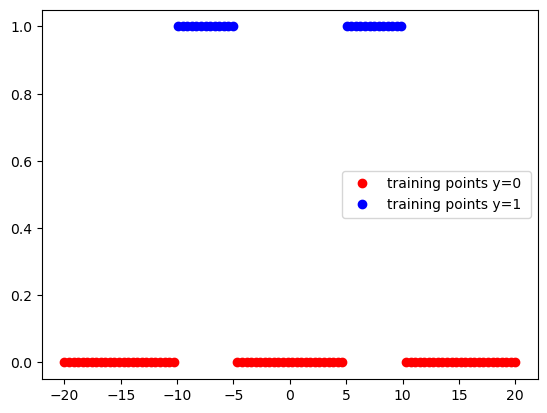

In [8]:
PlotStuff(data_set.x,data_set.y)

Create our model with 9
neurons in the hidden layer. And then create a BCE loss and an Adam optimizer.


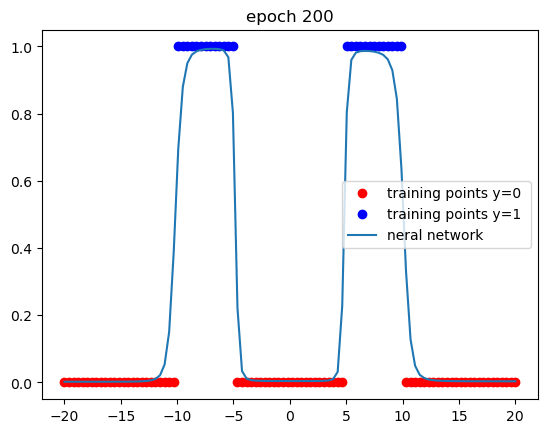

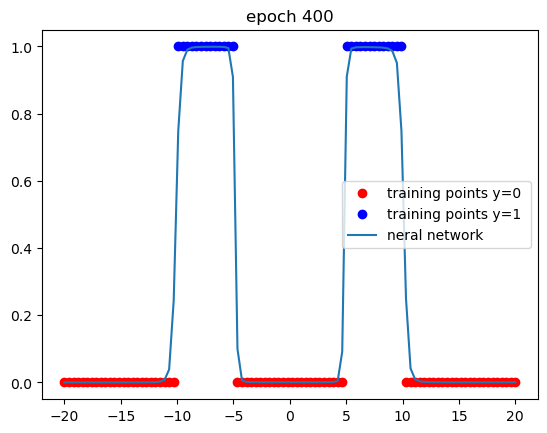

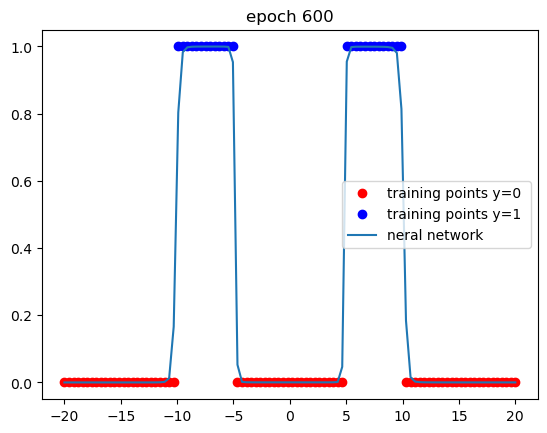

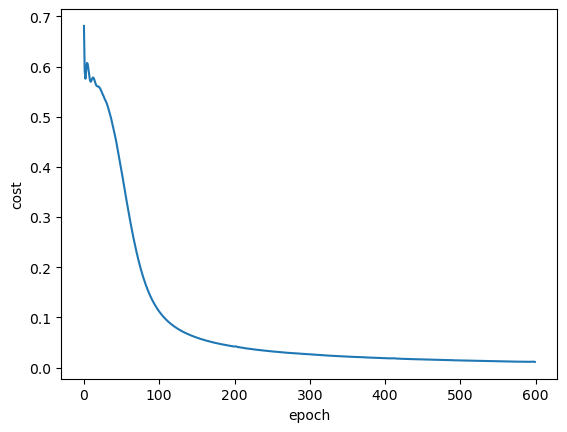

In [9]:
torch.manual_seed(0)
model=Net(1,9,1)
learning_rate=0.1
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loader=DataLoader(dataset=data_set,batch_size=100)
COST=train(data_set,model,criterion, train_loader, optimizer, epochs=600,plot_number=200)

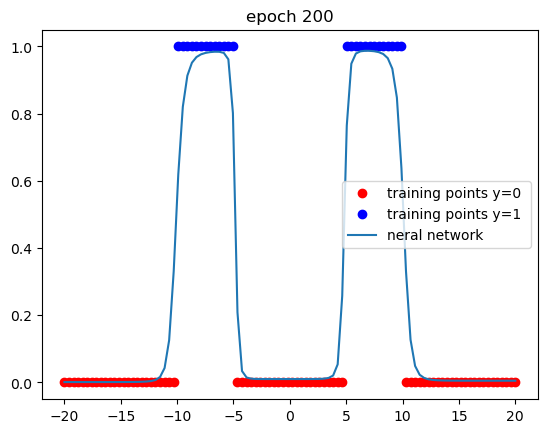

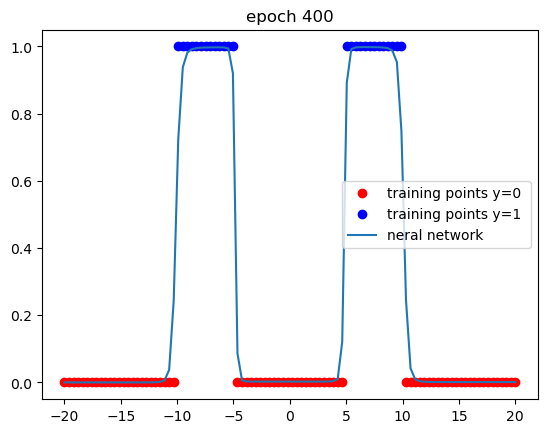

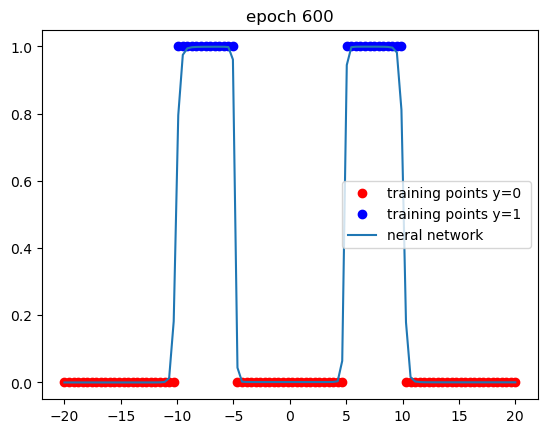

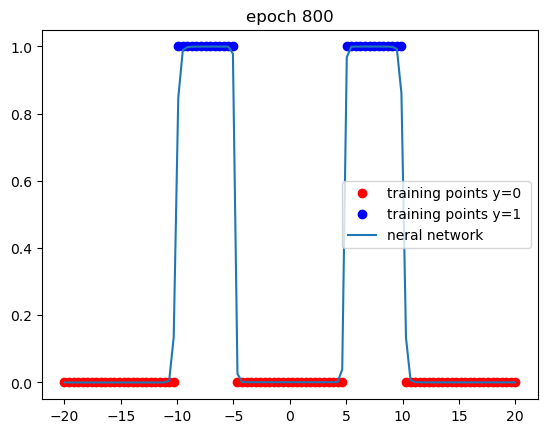

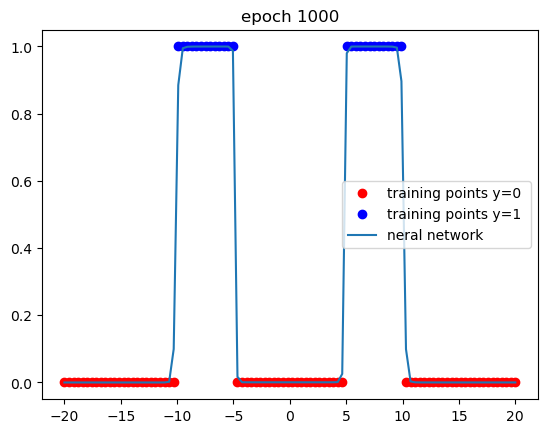

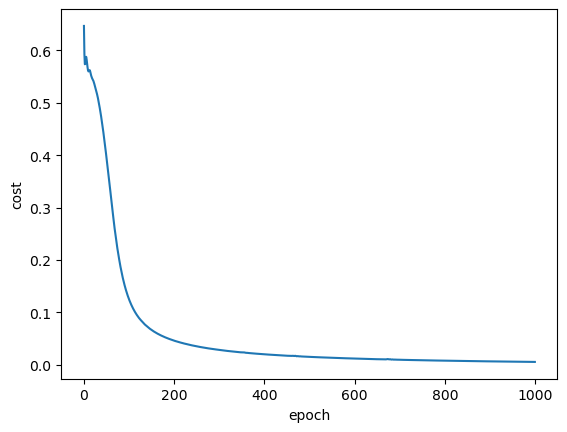

In [15]:
# this is for exercises
model1 = torch.nn.Sequential(
    torch.nn.Linear(1, 6), 
    torch.nn.Sigmoid(),
    torch.nn.Linear(6,1),
    torch.nn.Sigmoid()

)
learning_rate=0.1
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model1.parameters(), lr=learning_rate)
train_loader=DataLoader(dataset=data_set, batch_size=100)
COST=train(data_set, model1, criterion, train_loader, optimizer, epochs=1000,plot_number=200)

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD. 


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>, <a href="https://www.linkedin.com/in/fanjiang0619/">Fan Jiang</a>, <a href="https://www.linkedin.com/in/yi-leng-yao-84451275/">Yi Leng Yao</a>, <a href="https://www.linkedin.com/in/sacchitchadha/">Sacchit Chadha</a>


<!--
## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-23  | 2.0  | Shubham  |  Migrated Lab to Markdown and added to course repo in GitLab |
-->





## <h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
